# Chip Retail Analysis 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option("display.max_row", 500)

In [14]:
dataset =  pd.read_csv("QVI_purchase_behaviour.csv")
transactions_df = pd.read_excel("QVI_transaction_data.xlsx")
data = dataset.copy()

In [3]:
dataset.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [4]:
transactions_df.head()

,DATE,STORE_NBR,LYLTY_CARD_NBR,TXN_ID,PROD_NBR,PROD_NAME,PROD_QTY,TOT_SALES
0,43390,1,1000,1,5,Natural Chip Compny SeaSalt175g,2,6.0
1,43599,1,1307,348,66,CCs Nacho Cheese 175g,3,6.3
2,43605,1,1343,383,61,Smiths Crinkle Cut Chips Chicken 170g,2,2.9
3,43329,2,2373,974,69,Smiths Chip Thinly S/Cream&Onion 175g,5,15.0
4,43330,2,2426,1038,108,Kettle Tortilla ChpsHny&Jlpno Chili 150g,3,13.8


In [5]:
print(dataset.shape)
print(transactions_df.shape)

(72637, 3)
(264836, 8)


In [6]:
# check for dublicate data

card_no = len(set(dataset.LYLTY_CARD_NBR))
card_no_total = dataset.shape[0]
dub_card =  card_no_total - card_no
print(dub_card)

0


In [7]:
# firsr start start analysing customer csv_file
# set index as LYLTY_CARD_NBR

#dataset.set_index("LYLTY_CARD_NBR", inplace = True)
dataset.head()


,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [8]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72637 entries, 0 to 72636
Data columns (total 3 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   LYLTY_CARD_NBR    72637 non-null  int64 
 1   LIFESTAGE         72637 non-null  object
 2   PREMIUM_CUSTOMER  72637 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [9]:
dataset.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

In [10]:
dataset.isnull().sum()

LYLTY_CARD_NBR      0
LIFESTAGE           0
PREMIUM_CUSTOMER    0
dtype: int64

There is no missing  values in this csv file.

### Count the number of customer in each segments 

In [17]:
data.head()

,LYLTY_CARD_NBR,LIFESTAGE,PREMIUM_CUSTOMER
0,1000,YOUNG SINGLES/COUPLES,Premium
1,1002,YOUNG SINGLES/COUPLES,Mainstream
2,1003,YOUNG FAMILIES,Budget
3,1004,OLDER SINGLES/COUPLES,Mainstream
4,1005,MIDAGE SINGLES/COUPLES,Mainstream


In [22]:
data["LIFESTAGE_PAR"] = (data["LIFESTAGE_"].value_counts / data["LIFESTAGE"].value_counts.sum())* 100
data["LIFESTAGE"].value_counts(normalize = False).plot(kind = "bar", figsize = [10, 5])
data["LIFESTAGE"].value_counts()

AttributeError: 'function' object has no attribute 'sum'

Mainstream    29245
Budget        24470
Premium       18922
Name: PREMIUM_CUSTOMER, dtype: int64

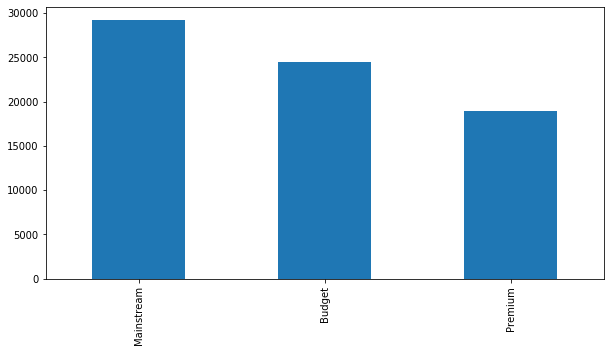

In [12]:
dataset["PREMIUM_CUSTOMER"].value_counts().plot(kind = "bar", figsize = [10, 5])
dataset["PREMIUM_CUSTOMER"].value_counts()